# Import libraries
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import glob
import os

# Import dataframes
___

In [2]:
def read_csv(directory):
    path = directory
    all_files = glob.glob(os.path.join(path, '*.csv'))

    l = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        l.append(df)

    df = pd.concat(l, axis=0, ignore_index=True)
    
    return df

In [3]:
climate_df = read_csv('Climate_data')
carbon_df = read_csv('CO2_data')

# Data preparation
___

In [4]:
climate_df['DATE'] = pd.to_datetime(climate_df['DATE'])

In [5]:
columns = {'DATE':'Date',
           'ADPT':'Average Dew Point Temperature', 
           'AWND':'Average Wind Speed',
           'PRCP':'Total Monthly Precipitation',
           'PSUN':'Monthly Average of the daily percents of possible sunshine',
           'TAVG':'Average Monthly Temperature',
           'TMAX':'Monthly Maximum Temperature',
           'TMIN':'Monthly Minimum Temperature',
           'RHAV':'Relative Humidity'}

climate_df = climate_df.rename(columns=columns)

In [6]:
cols = ['Date',
        'Average Dew Point Temperature',
        'Average Wind Speed',
        'Total Monthly Precipitation',
        'Monthly Average of the daily percents of possible sunshine',
        'Average Monthly Temperature',
        'Monthly Maximum Temperature',
        'Monthly Minimum Temperature',
        'Relative Humidity']

def create_df(name, column_names, dataframe, site='NAME'):
    df = dataframe[dataframe[site] == name]
    df = df[column_names]
    return df.set_index('Date')

### Climate data
___

In [7]:
bou = create_df('BOULDER, CO US', cols, climate_df)
hil = create_df('HILO INTERNATIONAL AIRPORT 87, HI US', cols, climate_df)
hoh = create_df('HOHENPEISSENBERG, GM', cols, climate_df)
cap = create_df('CAPE FLORIDA, FL US', cols, climate_df)
los = create_df('LOS ANGELES DOWNTOWN USC, CA US', cols, climate_df)
san = create_df('SAN FRANCISCO DOWNTOWN, CA US', cols, climate_df)
ice = create_df('VESTMANNAEYJAR, IC', cols, climate_df)
tem = create_df('TEMPLE DRAUGHTON MIL, TX US', cols, climate_df)

bou = Boulder, CO
<br>hil = Hilo International, HI
<br>hoh = Hohenpeissenberg, GM
<br>cap = Cape Florida, FL
<br>los = Los Angeles, CA
<br>san = San Francisco, CA
<br>ice = Vestmannaeyjar, IC
<br>tem = Temple, TX

### Carbon emission data
___

In [8]:
carbon_df[['year', 'month']] = carbon_df[['year', 'month']].astype(str)
carbon_df['Date'] = carbon_df[['year', 'month']].agg(''.join, axis=1)
carbon_df['Date'] = carbon_df['Date'].astype(int)
carbon_df['Date'] = pd.to_datetime(carbon_df['Date'], format='%Y%m')

In [9]:
cols_co2 = ['Date', 'site_code', 'latitude', 'longitude', 'value',]

bou_co2 = create_df('BAO', cols_co2, carbon_df, site='site_code')
hil_co2 = create_df('MLO', cols_co2, carbon_df, site='site_code')
hoh_co2 = create_df('HPB', cols_co2, carbon_df, site='site_code')
cap_co2 = create_df('KEY', cols_co2, carbon_df, site='site_code')
los_co2 = create_df('MWO', cols_co2, carbon_df, site='site_code')
san_co2 = create_df('STR', cols_co2, carbon_df, site='site_code')
ice_co2 = create_df('ICE', cols_co2, carbon_df, site='site_code')
tem_co2 = create_df('WKT', cols_co2, carbon_df, site='site_code')

WKT - Moody, TX
<br>MLO - Mauna Loa, HI

# Data analysis/visualization
___

In [10]:
def plot(y_value, df, x_value='Date', bin_num=100):    
    median = df[y_value].median()
    
    sns.set(rc={'figure.figsize':(10,10)})
    sns.set_style('white')
    
    fig, axs = plt.subplots(2, 1, figsize=(15, 10), dpi=100)
    sns.scatterplot(data=df, x=x_value, y=y_value, ax=axs[0])
    sns.histplot(data=df[y_value], kde=True, bins=bin_num, ax=axs[1])
    axs[1].axvline(median, color='r')
    plt.tight_layout()

In [11]:
def outlier(df, column='value'):
    
    median = df[column].median()
    df.loc[df['value'] < 0, 'value'] = median
    
    std = df[column].std()
    outliers = (df[column] - median).abs() > 3*std

    df.loc[outliers] = np.nan
    df[column].fillna(median, inplace=True)
    
    return df

In [12]:
def Z_score(df):
    # get a sample of data from dataframe
    df_sample = df.sample(frac=0.5)
    
    # calculate the mean of that sample
    x = np.log(df_sample).mean()
    
    # calculate the mean of the whole dataframe
    mu = np.log(df).mean()
    
    # number of samples
    n = len(df)/2
    
    # calculate the standard deviation of the whole dataframe
    sigma = np.log(df).std()
    
    # translate the z-score formula into code
    Z = abs(x - mu)/ (sigma/np.sqrt(n))
    return Z

In [13]:
cols_ = ['Average Dew Point Temperature',
        'Average Wind Speed',
        'Total Monthly Precipitation',
        'Monthly Average of the daily percents of possible sunshine',
        'Average Monthly Temperature',
        'Monthly Maximum Temperature',
        'Monthly Minimum Temperature',
        'Relative Humidity']

def plot_climate(df):
    for col in cols_:
        if len(df[col]) != df[col].isna().sum():
            plot(col, df)

### Climate data analysis
___

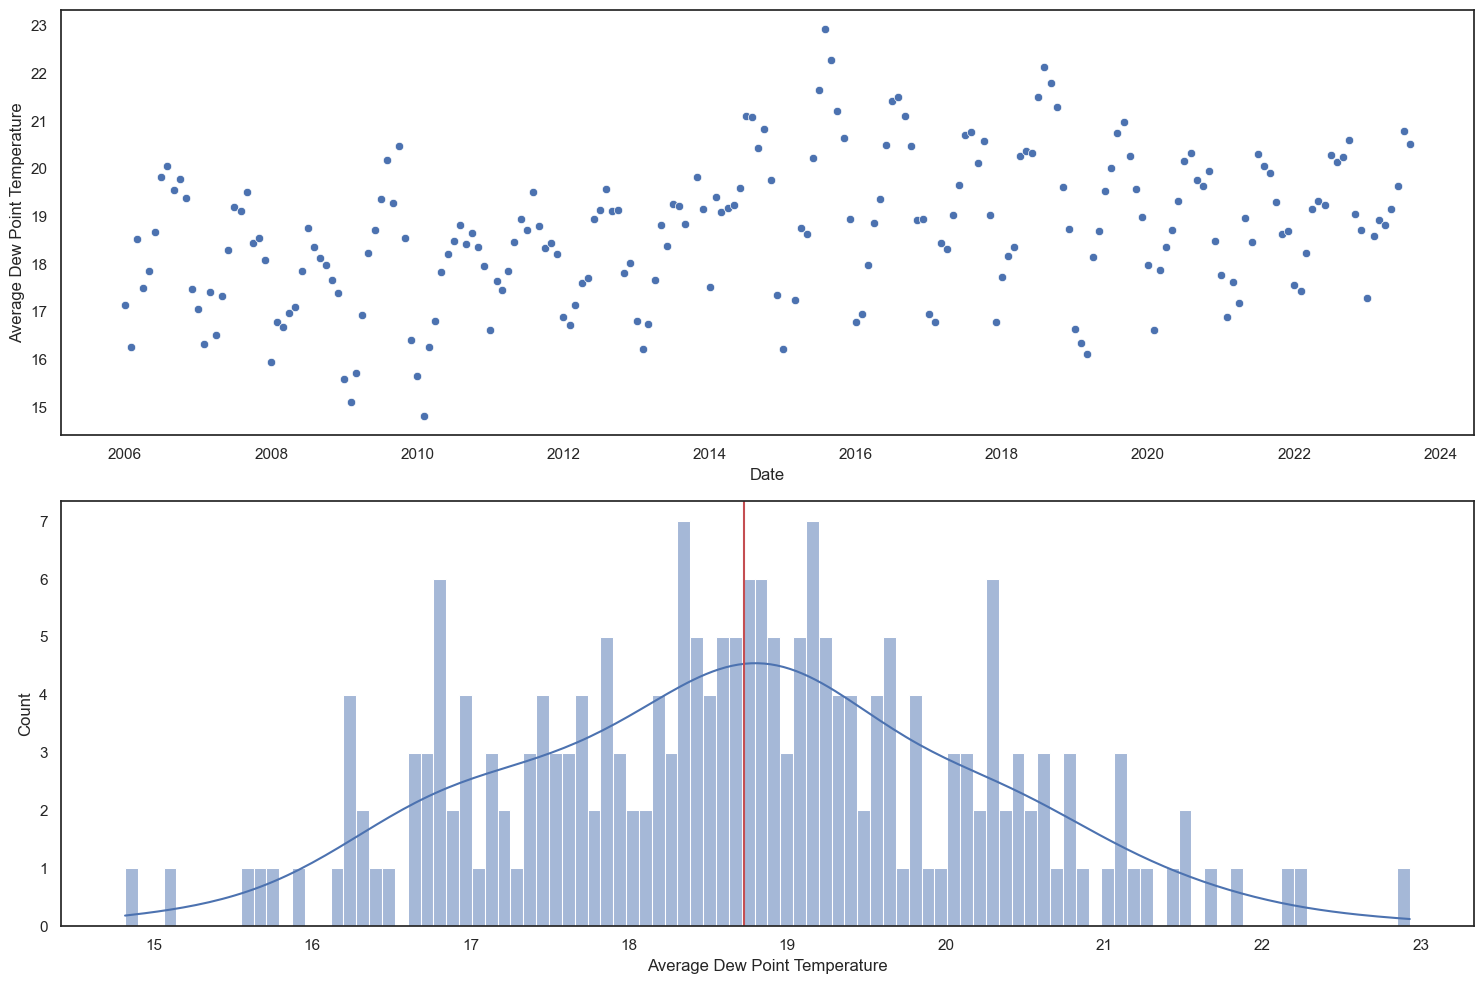

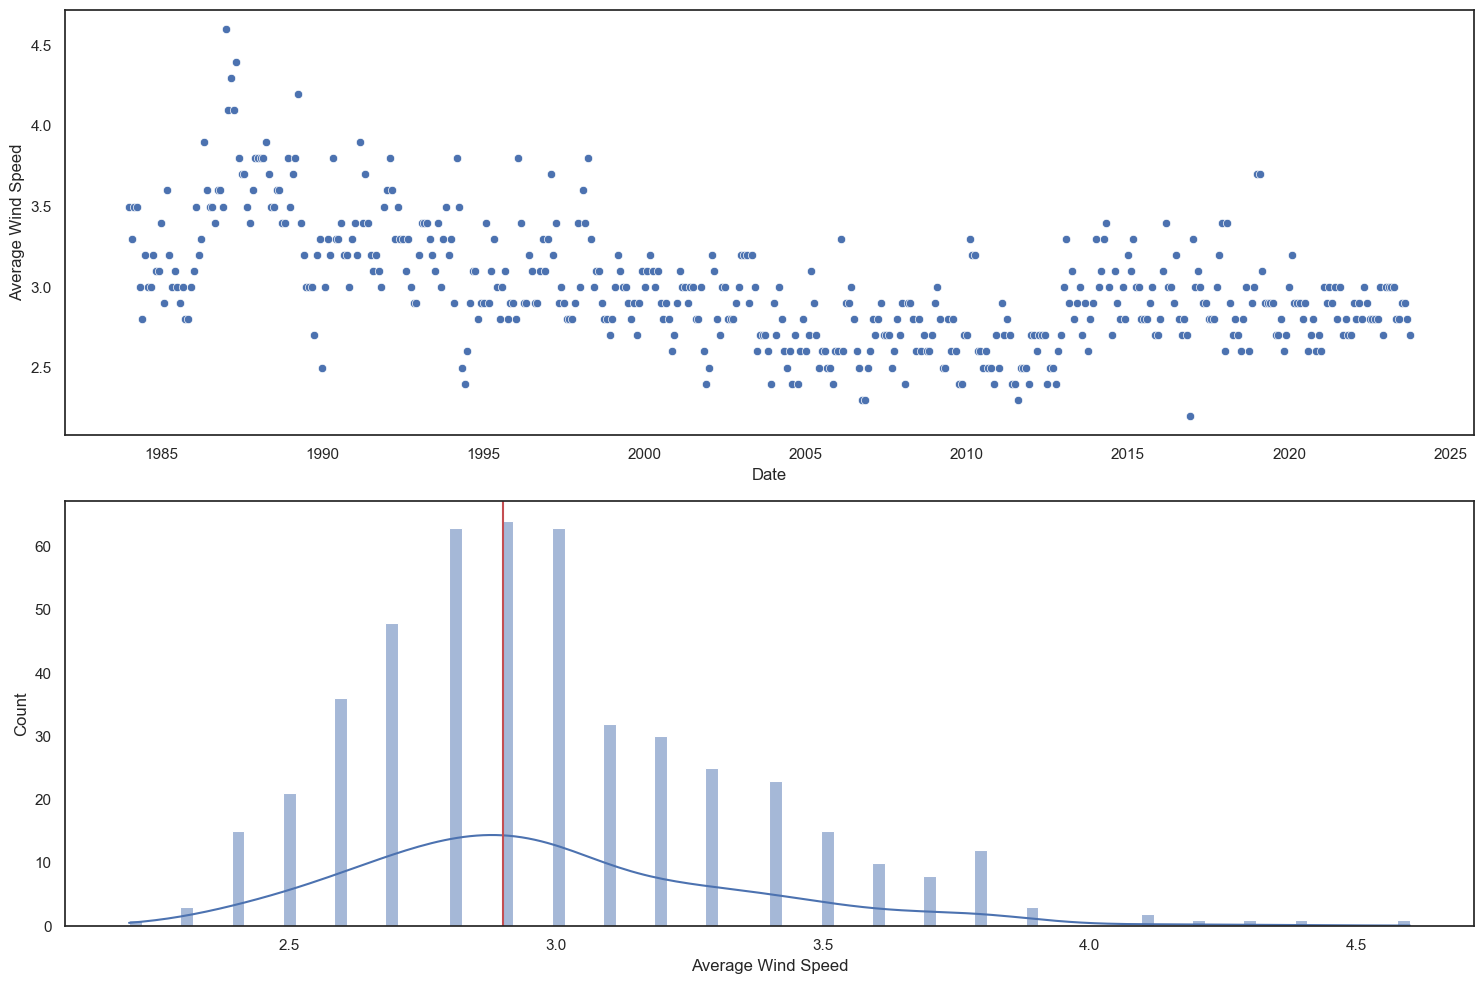

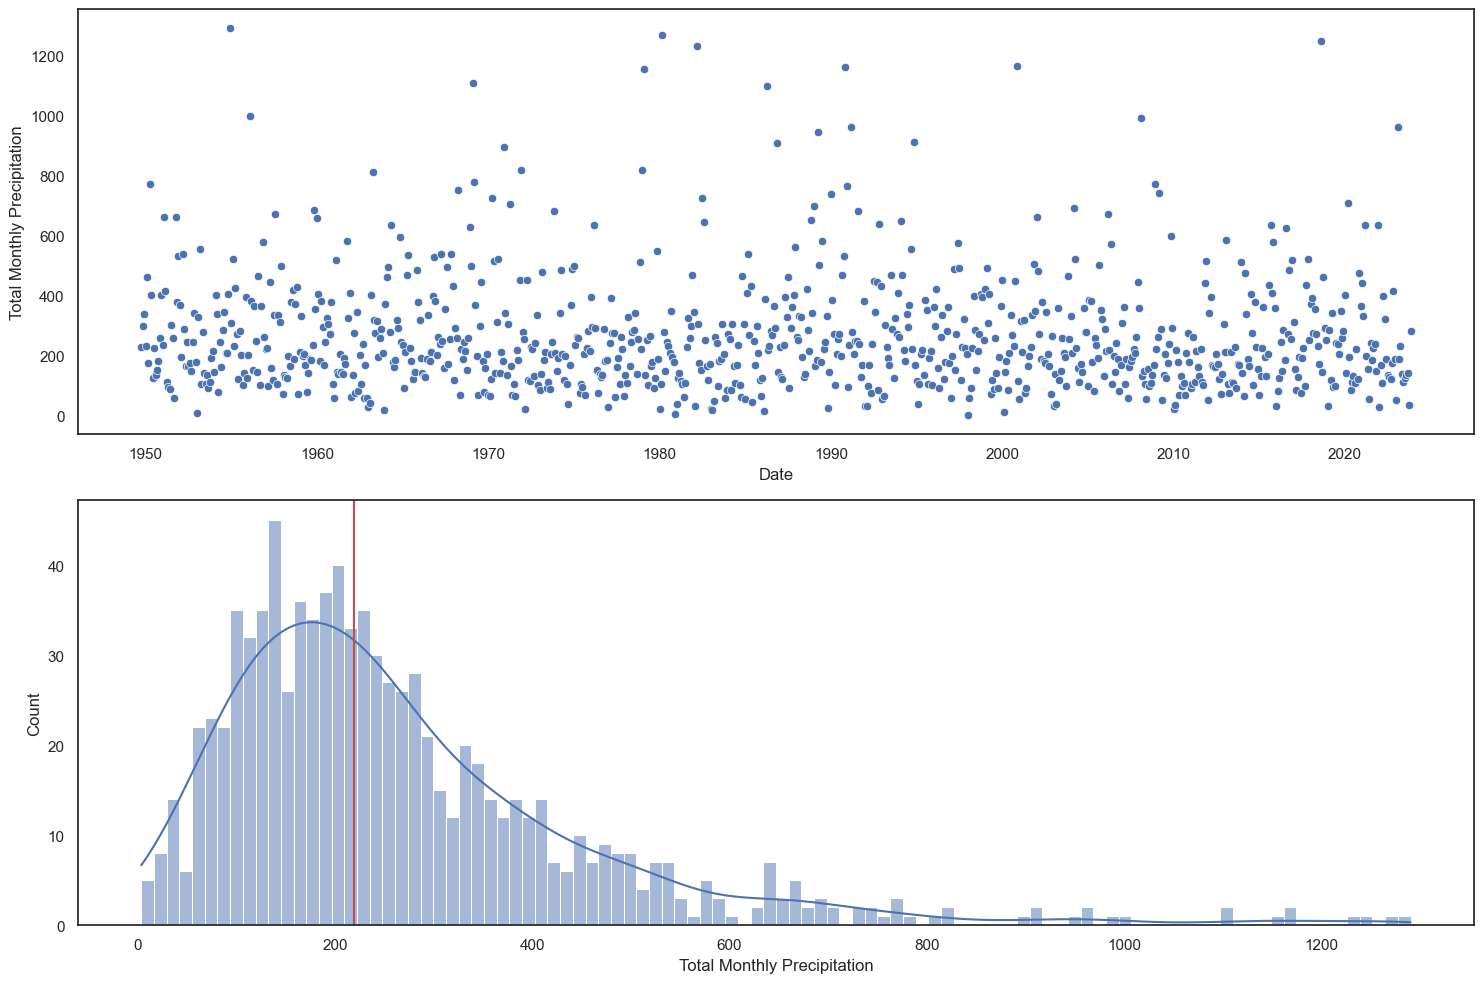

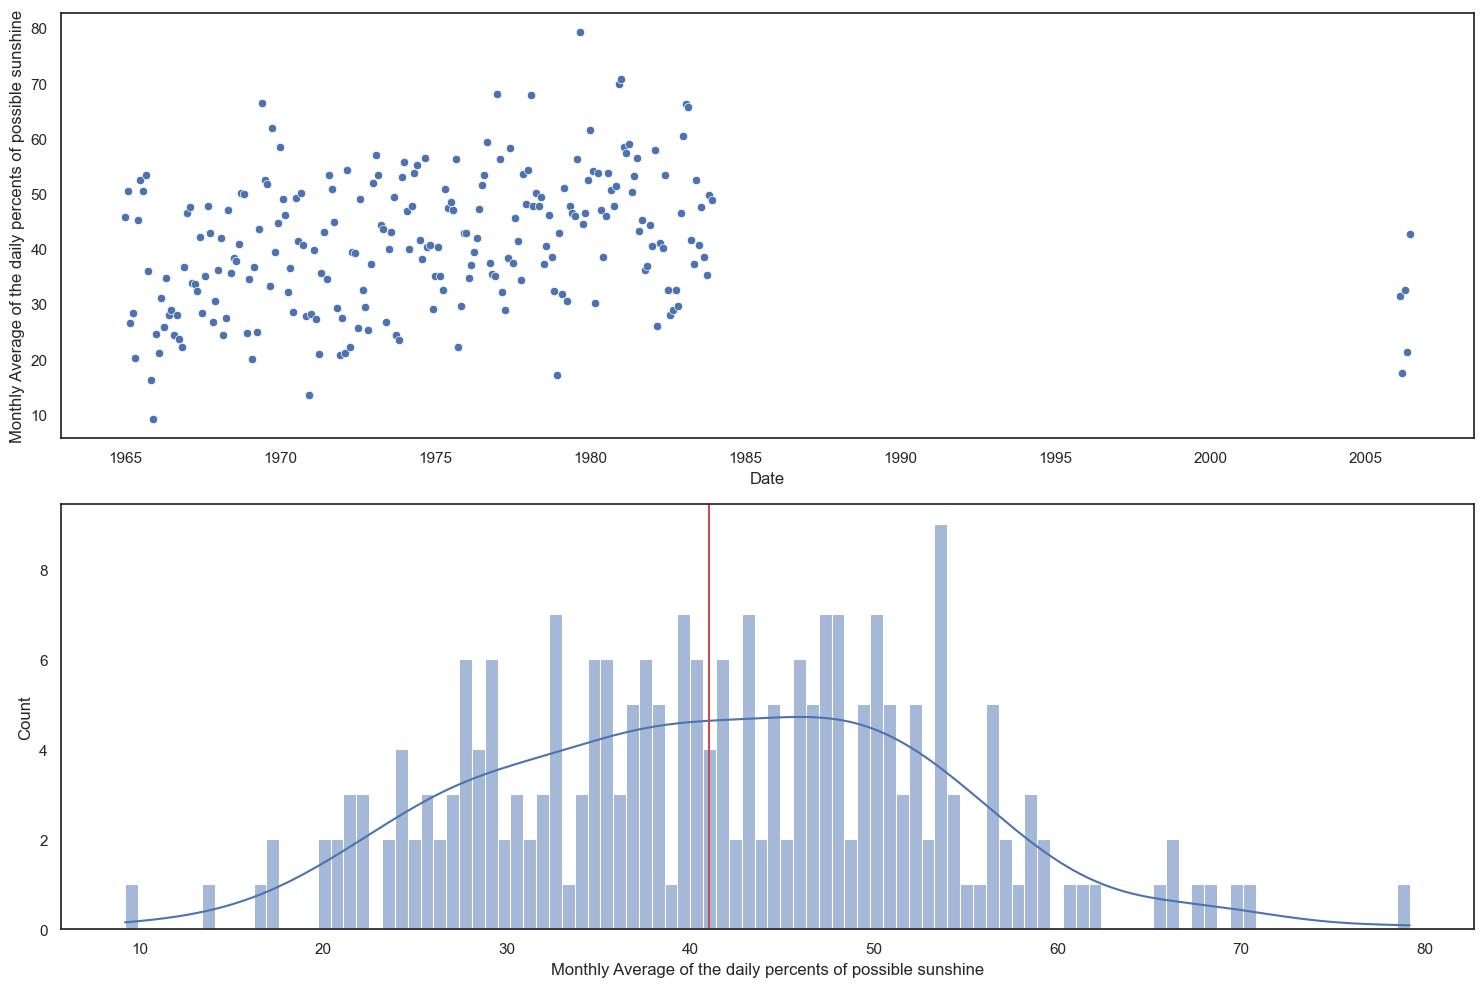

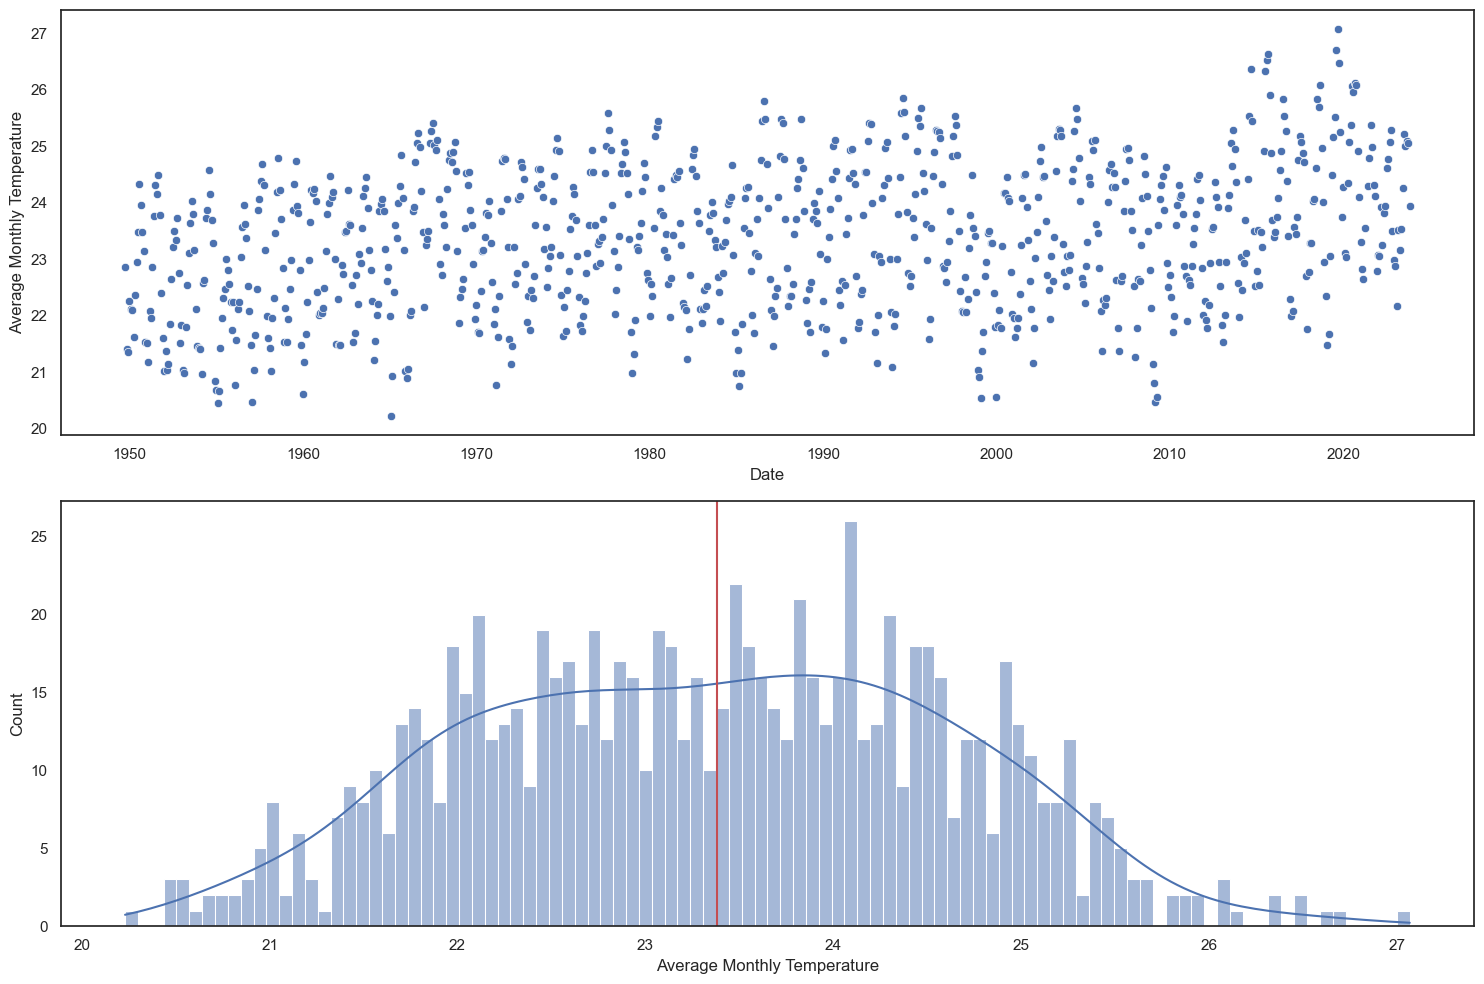

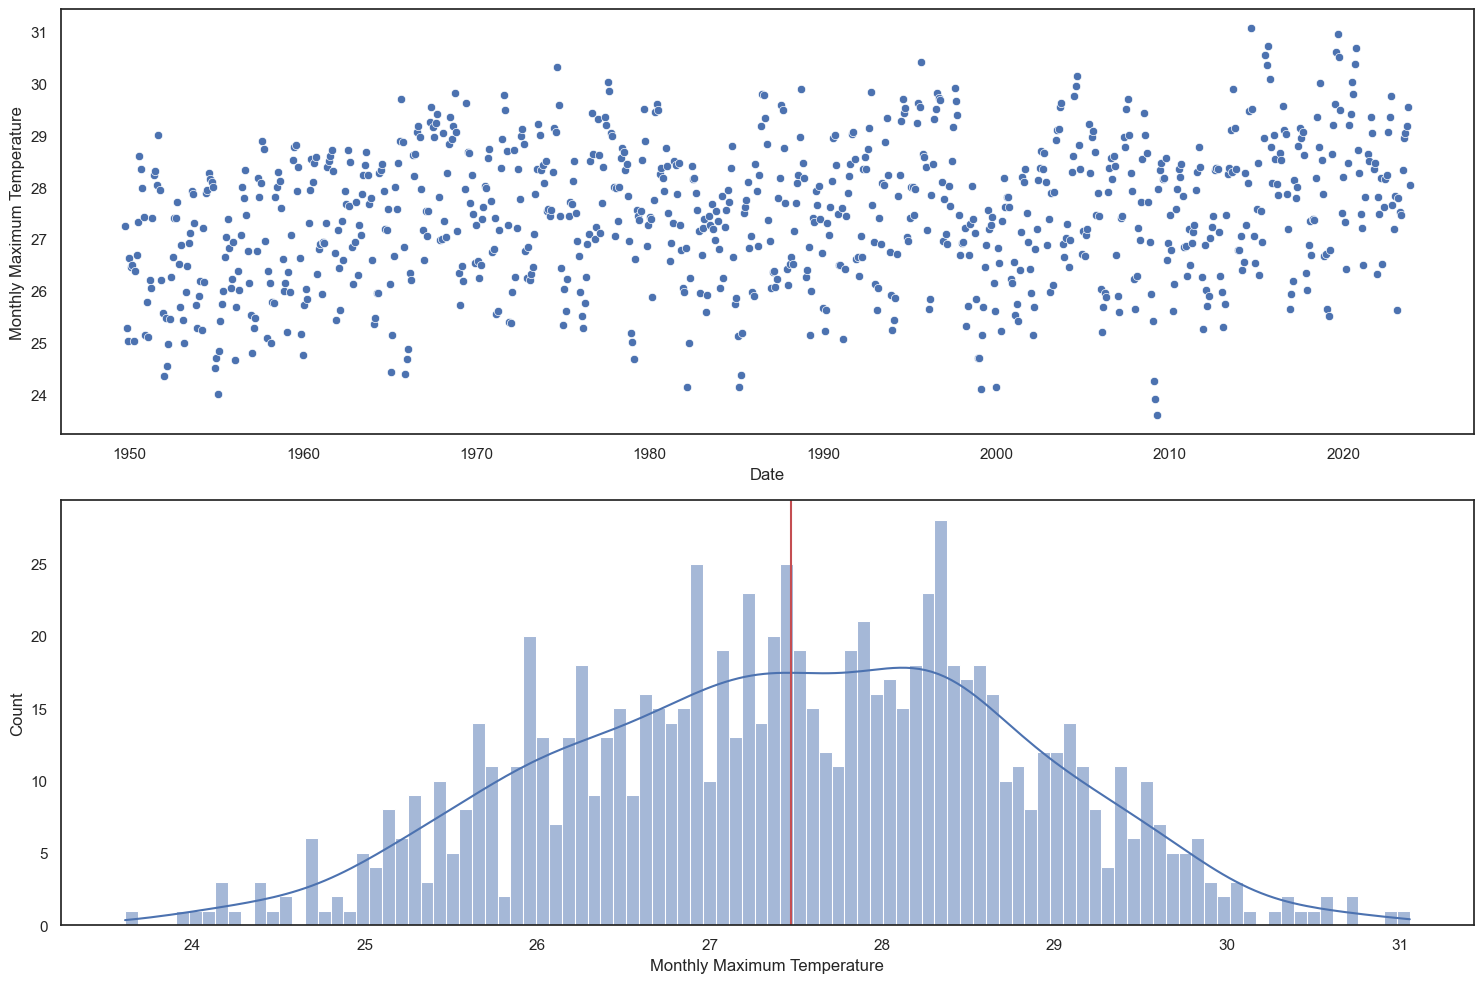

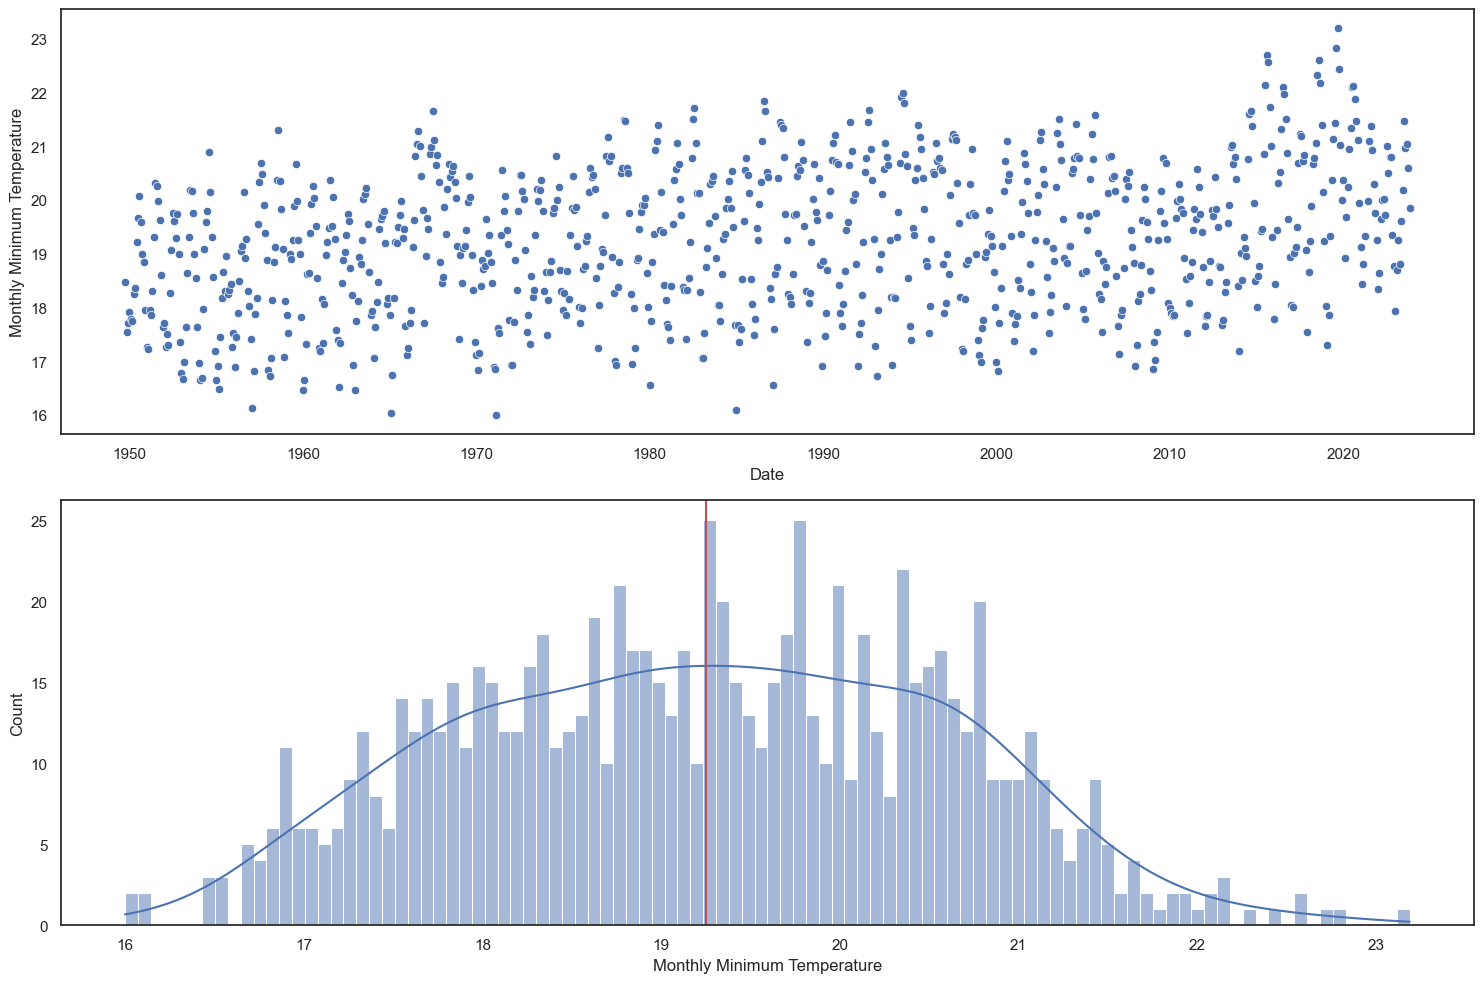

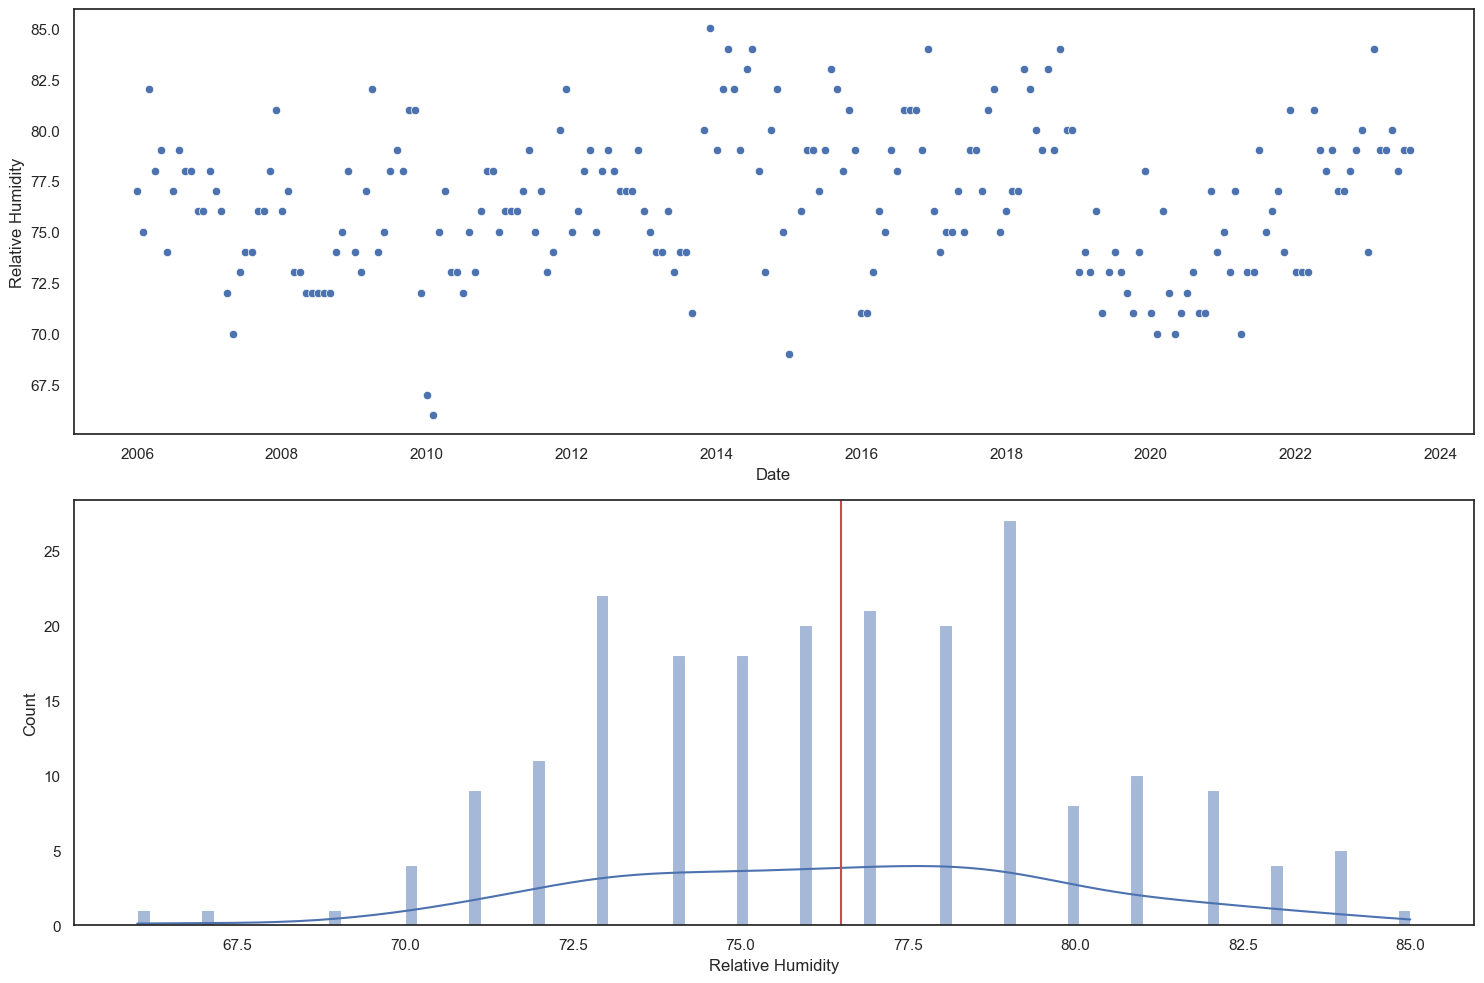

In [14]:
plot_climate(hil)

### Carbon emission analysis
___

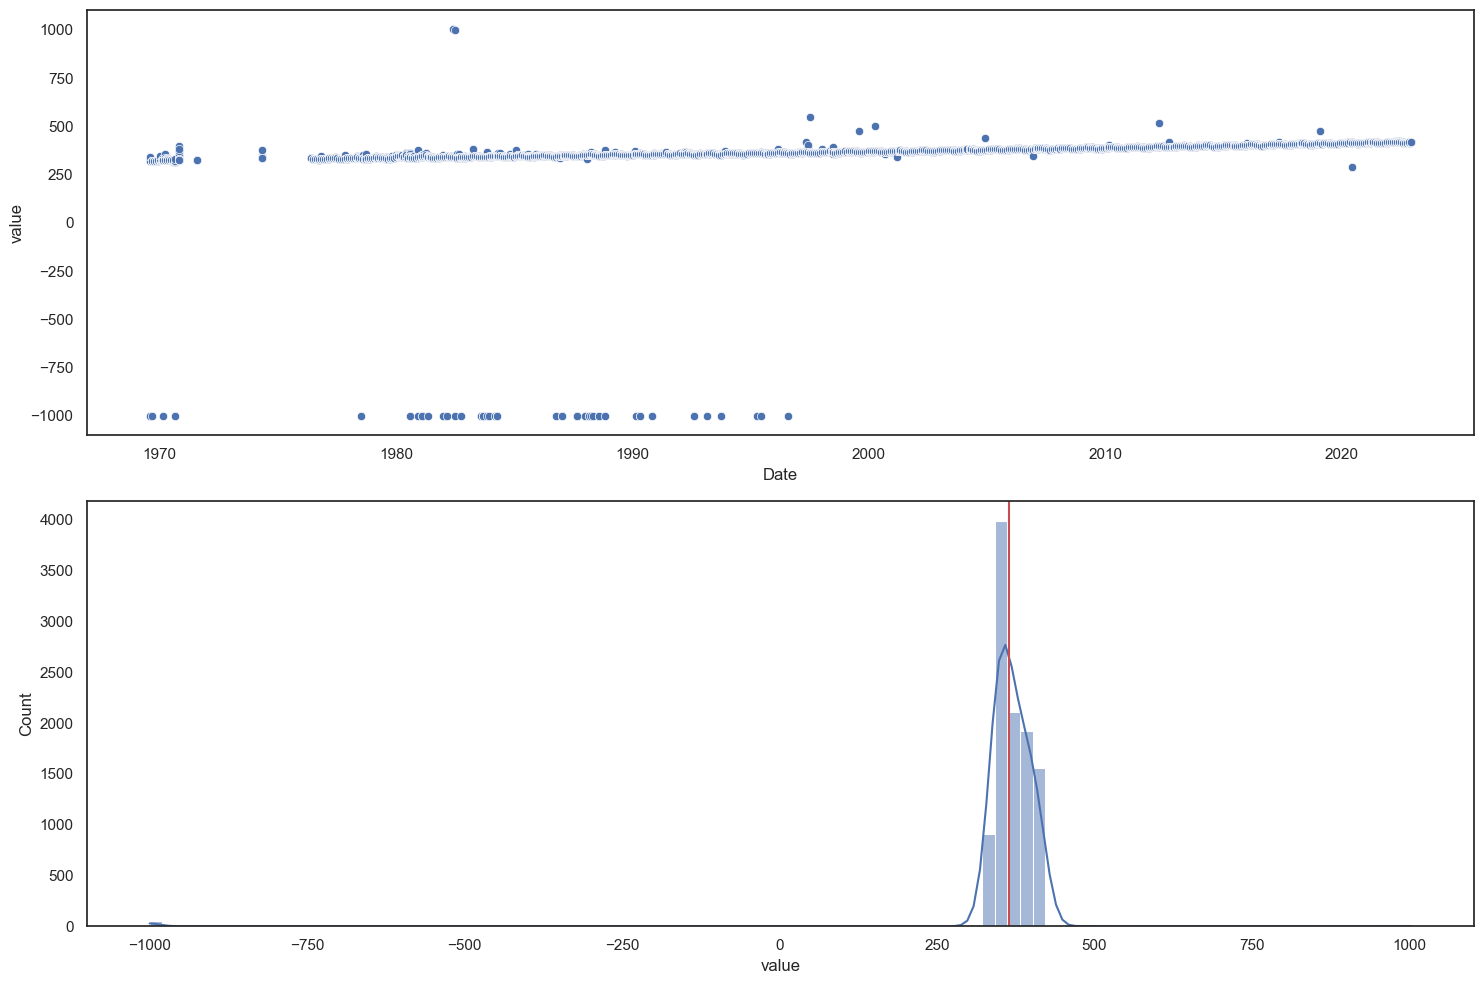

In [15]:
plot('value', df=hil_co2)

In [16]:
bou_co2 = outlier(bou_co2)
hil_co2 = outlier(hil_co2)
hoh_co2 = outlier(hoh_co2)
cap_co2 = outlier(cap_co2)
los_co2 = outlier(los_co2)
san_co2 = outlier(san_co2)
ice_co2 = outlier(ice_co2)
tem_co2 = outlier(tem_co2)

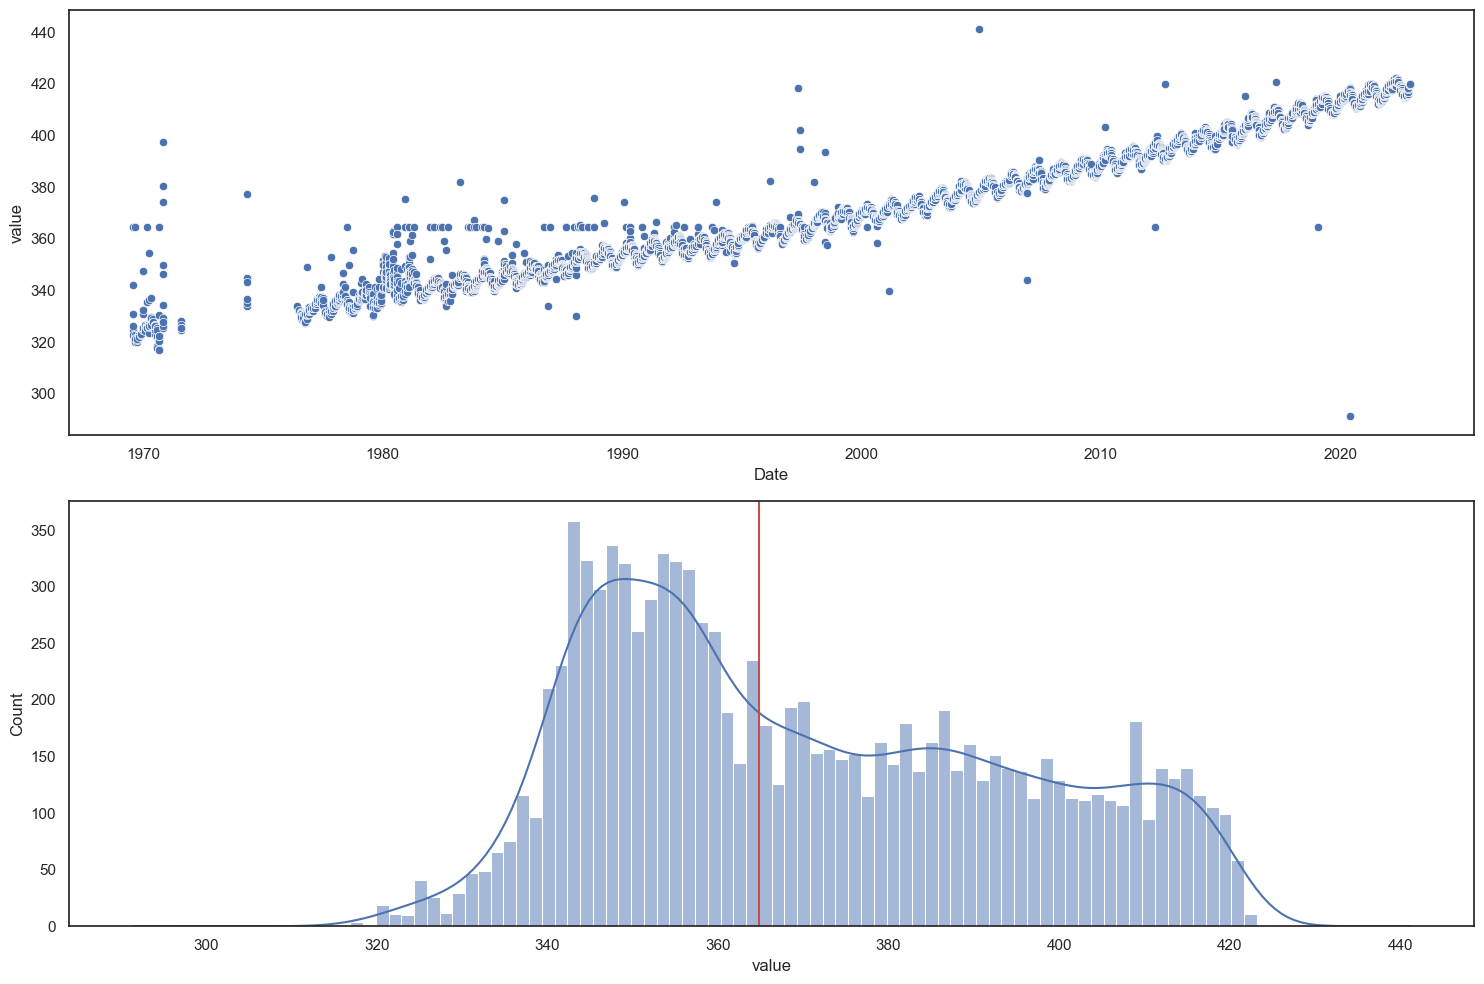

In [17]:
plot('value', df=hil_co2)

In [18]:
def boxplot(y_value, df, title):
    sns.set(rc={'figure.figsize':(15,8)})
    sns.set_style('white')
    sns.boxplot(data=df, x=df.index, y=y_value).set_title(title, fontsize=25)
    plt.ylabel('CO2 Emissions')
    plt.xticks(rotation=90)

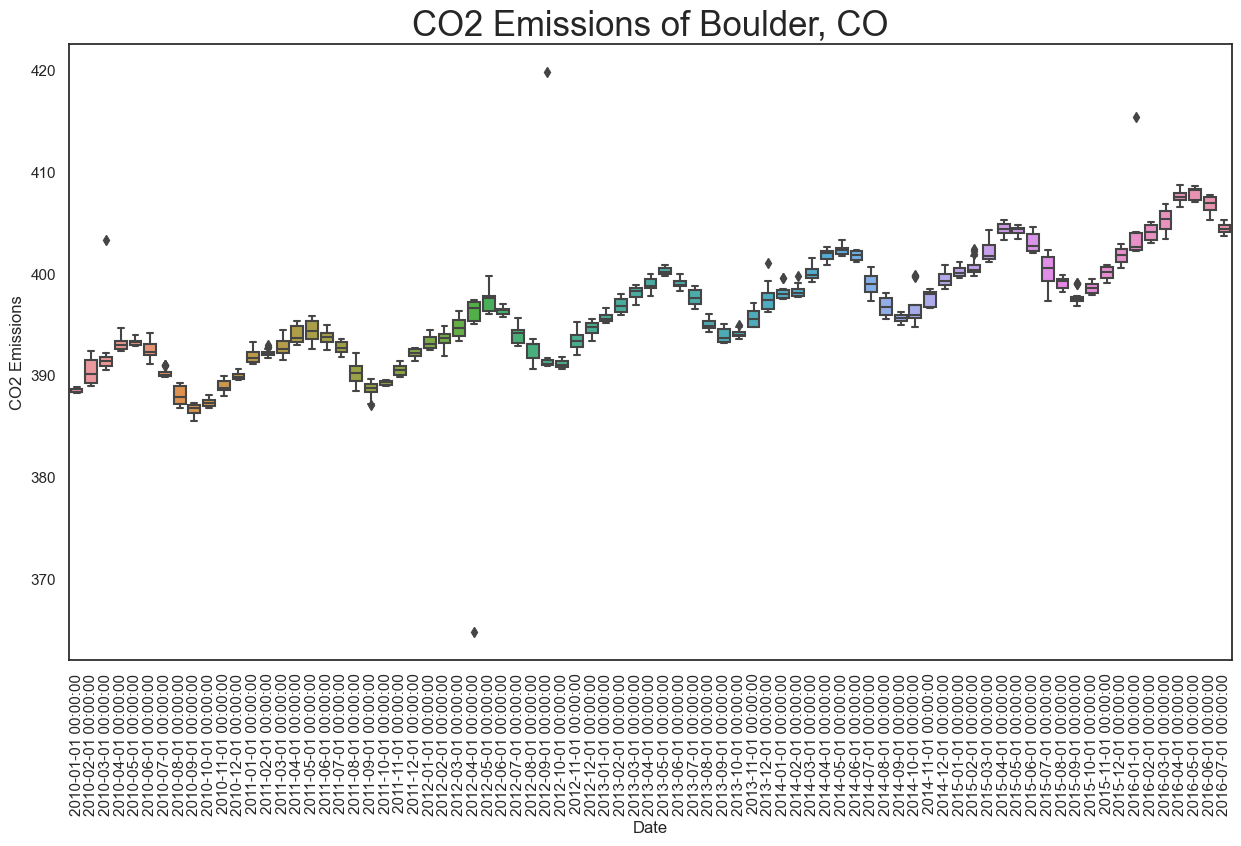

In [19]:
boxplot('value', hil_co2['2010-01-01':'2016-07-01'], title='CO2 Emissions of Boulder, CO')

### Combining climate and carbon emission dataframes
___

In [20]:
def monthly_averages(climate_df, co2_df):
    grouper = pd.Grouper(level='Date', freq='M')
    df = climate_df.groupby(grouper).mean()
    df1 = co2_df.groupby(grouper).mean()
    return df.join(df1, lsuffix='_left', rsuffix='_right', how='outer')

In [21]:
bou_monthly = monthly_averages(bou, bou_co2)
hil_monthly = monthly_averages(hil, hil_co2)
hoh_monthly = monthly_averages(hoh, hoh_co2)
cap_monthly = monthly_averages(cap, cap_co2)
los_monthly = monthly_averages(los, los_co2)
san_monthly = monthly_averages(san, san_co2)
ice_monthly = monthly_averages(ice, ice_co2)
tem_monthly = monthly_averages(tem, tem_co2)

In [22]:
list_df = [bou_monthly, hil_monthly,
           hoh_monthly, cap_monthly,
           los_monthly, san_monthly,
           ice_monthly, tem_monthly]

for df in list_df:
    for col in df.columns:
        if df[col].isna().sum() < 0.25*len(df[col]):
            median = df[col].median()
            df[col].fillna(median, inplace=True)

In [23]:
for df in list_df:
    df.dropna(subset=['value'],how='any',inplace=True)
    df['value'].isnull().sum()

In [24]:
# get rid of negative values by converting temperature into Kelvin
for df in list_df:
    df[['Average Dew Point Temperature',
        'Average Monthly Temperature',
        'Monthly Maximum Temperature',
        'Monthly Minimum Temperature']] += 273

In [25]:
for df in list_df:
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    # Winter: 1, Spring: 2, Summer: 3, Autumn: 4
    df['season'] = ((df.index.month % 12 + 3) // 3)

In [26]:
print(
    'Z-score of CO2 values of Boulder:', Z_score(bou_monthly['value']),
    '\nZ-score of CO2 values of Hilo International:', Z_score(hil_monthly['value']),
    '\nZ-score of CO2 values of Hohpeissenberg:', Z_score(hoh_monthly['value']),
    '\nZ-score of CO2 values of Cape Florida:', Z_score(cap_monthly['value']),
    '\nZ-score of CO2 values of Los Angeles:', Z_score(los_monthly['value']),
    '\nZ-score of CO2 values of San Francisco:', Z_score(san_monthly['value']),
    '\nZ-score of CO2 values of Iceland:', Z_score(ice_monthly['value']),
    '\nZ-score of CO2 values of Moody:', Z_score(tem_monthly['value'])
)

Z-score of CO2 values of Boulder: 1.135086149101418 
Z-score of CO2 values of Hilo International: 0.4387833738528242 
Z-score of CO2 values of Hohpeissenberg: 0.9279888948385758 
Z-score of CO2 values of Cape Florida: 0.6303816973726041 
Z-score of CO2 values of Los Angeles: 0.04640712593903387 
Z-score of CO2 values of San Francisco: 0.8322886594806709 
Z-score of CO2 values of Iceland: 0.5717418668426637 
Z-score of CO2 values of Moody: 0.06580968086488301


In [27]:
print(
    'Z-score of Average Monthly Temperature of Boulder:', Z_score(bou_monthly['Average Monthly Temperature']),
    '\nZ-score of Average Monthly Temperature of Hilo International:', Z_score(hil_monthly['Average Monthly Temperature']),
    '\nZ-score of Average Monthly Temperature of Hohpeissenberg:', Z_score(hoh_monthly['Average Monthly Temperature']),
    '\nZ-score of Average Monthly Temperature of Cape Florida:', Z_score(cap_monthly['Average Monthly Temperature']),
    '\nZ-score of Average Monthly Temperature of Los Angeles:', Z_score(los_monthly['Average Monthly Temperature']),
    '\nZ-score of Average Monthly Temperature of San Francisco:', Z_score(san_monthly['Average Monthly Temperature']),
    '\nZ-score of Average Monthly Temperature of Iceland:', Z_score(ice_monthly['Average Monthly Temperature']),
    '\nZ-score of Average Monthly Temperature of Temple:', Z_score(tem_monthly['Average Monthly Temperature'])
)

Z-score of Average Monthly Temperature of Boulder: 0.1924009608136141 
Z-score of Average Monthly Temperature of Hilo International: 0.635142557724062 
Z-score of Average Monthly Temperature of Hohpeissenberg: 0.24751980755368547 
Z-score of Average Monthly Temperature of Cape Florida: 0.06597234554384228 
Z-score of Average Monthly Temperature of Los Angeles: 0.21404752062640084 
Z-score of Average Monthly Temperature of San Francisco: 0.2725037539065248 
Z-score of Average Monthly Temperature of Iceland: 0.17081150321122537 
Z-score of Average Monthly Temperature of Temple: 0.05017975207158217


A positive z-score indicates that the mean is higher than normal.

### Rolling mean function
___

In [28]:
def exp_rolling_mean(df, target='value'):
    # a sqrt transformation is used due to the presence of zero values
    data = pd.Series(np.sqrt(df[target]), index=df.index)
    exp_roll_mean = data.ewm(halflife=2).mean()
    data_minus_exp_roll_mean = data - exp_roll_mean
    return data_minus_exp_roll_mean

In [29]:
features = ['year', 'quarter', 'month', 'season']
target = ['Average Dew Point Temperature',
          'Average Wind Speed',
          'Total Monthly Precipitation',
          'Monthly Average of the daily percents of possible sunshine',
          'Average Monthly Temperature',
          'Monthly Maximum Temperature',
          'Monthly Minimum Temperature',
          'Relative Humidity',
          'value']

In [30]:
bou_rol = pd.DataFrame(index=bou_monthly.index)
hil_rol = pd.DataFrame(index=hil_monthly.index)
hoh_rol = pd.DataFrame(index=hoh_monthly.index)
cap_rol = pd.DataFrame(index=cap_monthly.index)
los_rol = pd.DataFrame(index=los_monthly.index)
san_rol = pd.DataFrame(index=san_monthly.index)
ice_rol = pd.DataFrame(index=ice_monthly.index)
tem_rol = pd.DataFrame(index=tem_monthly.index)

for x in target:
    bou_rol[x] = exp_rolling_mean(bou_monthly, target=x)
    hil_rol[x] = exp_rolling_mean(hil_monthly, target=x)
    hoh_rol[x] = exp_rolling_mean(hoh_monthly, target=x)
    cap_rol[x] = exp_rolling_mean(cap_monthly, target=x)
    los_rol[x] = exp_rolling_mean(los_monthly, target=x)
    san_rol[x] = exp_rolling_mean(san_monthly, target=x)
    ice_rol[x] = exp_rolling_mean(ice_monthly, target=x)
    tem_rol[x] = exp_rolling_mean(tem_monthly, target=x)

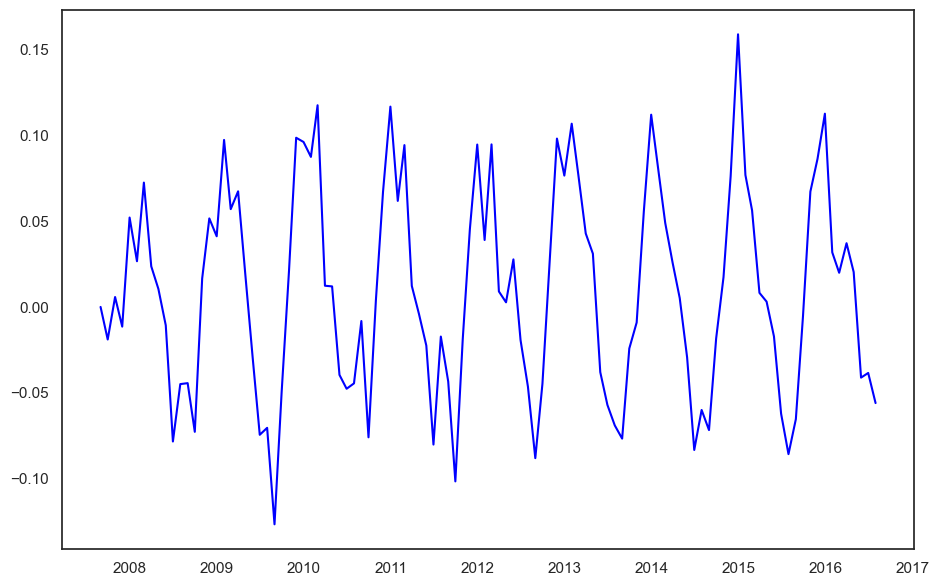

In [31]:
fig = plt.figure(figsize=(11,7))
plt.plot(exp_rolling_mean(bou_monthly, target='value'), color='blue')

plt.show(block=False)

# XGBoost model
___

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

### Preparing train/test sets
___

In [33]:
def train_test_split(df, split_date):
    df = df.copy()
    return df.loc[df.index < split_date], df.loc[df.index > split_date]

In [34]:
def split_date(df):
    return df.index[int(len(df.index)*.75)]

In [35]:
hil_train, hil_test = train_test_split(hil_monthly,
                                       split_date(hil_monthly['value']))

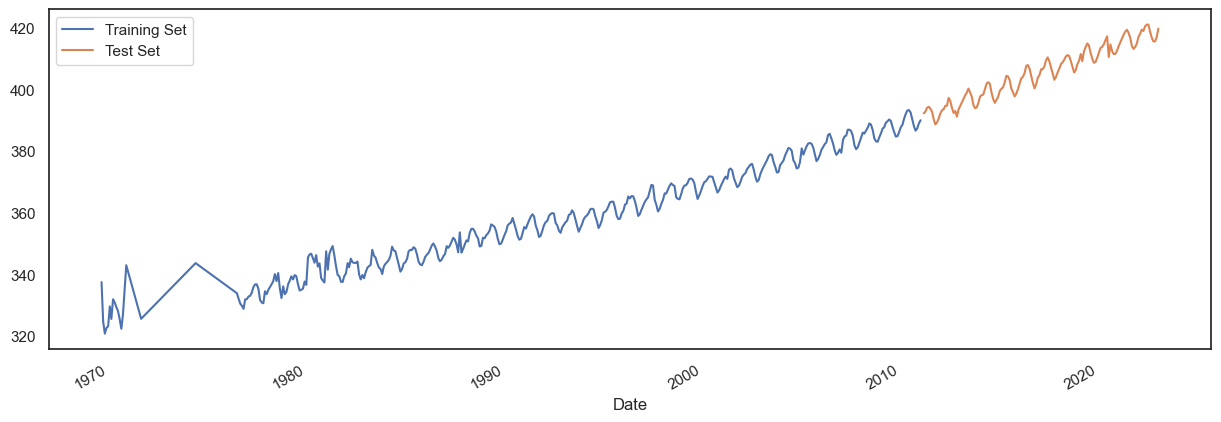

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
hil_train['value'].plot(ax=ax, label='Training Set')
hil_test['value'].plot(ax=ax, label='Test Set')

plt.legend()
plt.show();

In [37]:
def create_features(df):
    df = df.copy()
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['season'] = ((df.index.month % 12 + 3) // 3)
    return df

train = create_features(hil_train)
test = create_features(hil_test)

In [38]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [39]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)

reg.fit(X_train, exp_rolling_mean(y_train),
        eval_set=[(X_train, exp_rolling_mean(y_train)),
                  (X_test, exp_rolling_mean(y_test))],
        verbose=100)

[0]	validation_0-rmse:0.48913	validation_1-rmse:0.48624
[100]	validation_0-rmse:0.18260	validation_1-rmse:0.17882
[200]	validation_0-rmse:0.07171	validation_1-rmse:0.06616
[300]	validation_0-rmse:0.03257	validation_1-rmse:0.02759
[400]	validation_0-rmse:0.01970	validation_1-rmse:0.01768
[500]	validation_0-rmse:0.01609	validation_1-rmse:0.01594
[600]	validation_0-rmse:0.01425	validation_1-rmse:0.01581
[617]	validation_0-rmse:0.01404	validation_1-rmse:0.01581


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

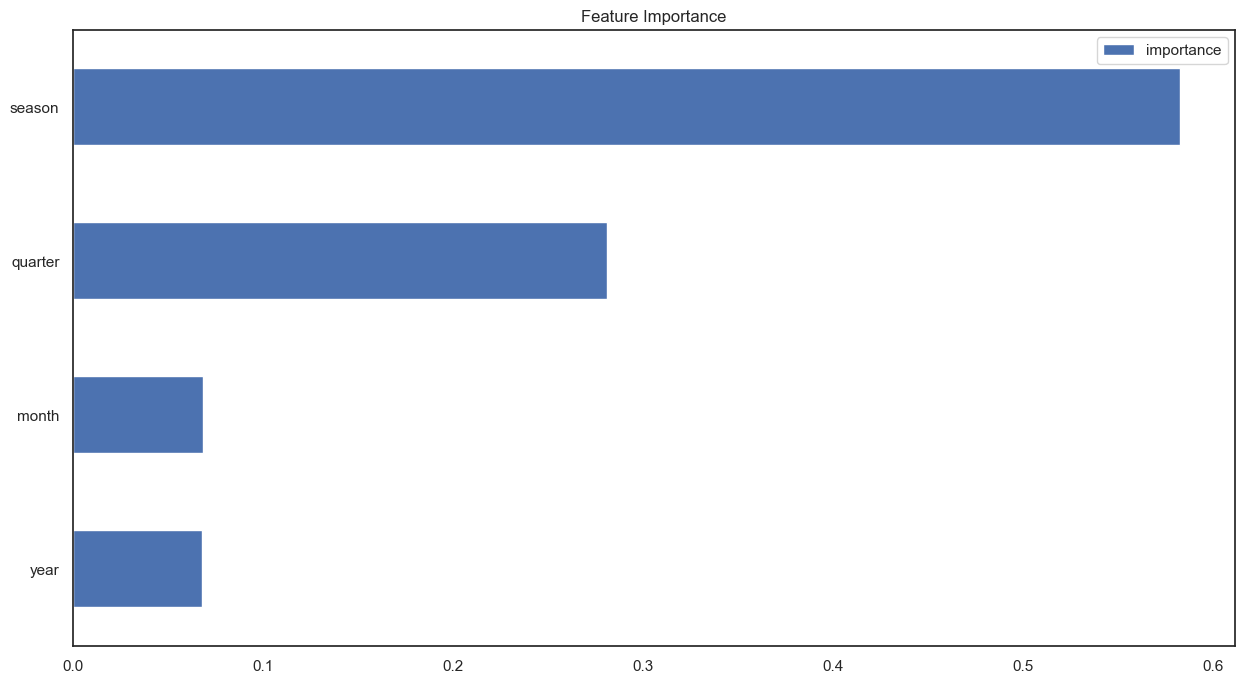

In [40]:
feat_importance = pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=['importance'])

feat_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show();

In [41]:
test['predictions'] = reg.predict(X_test)

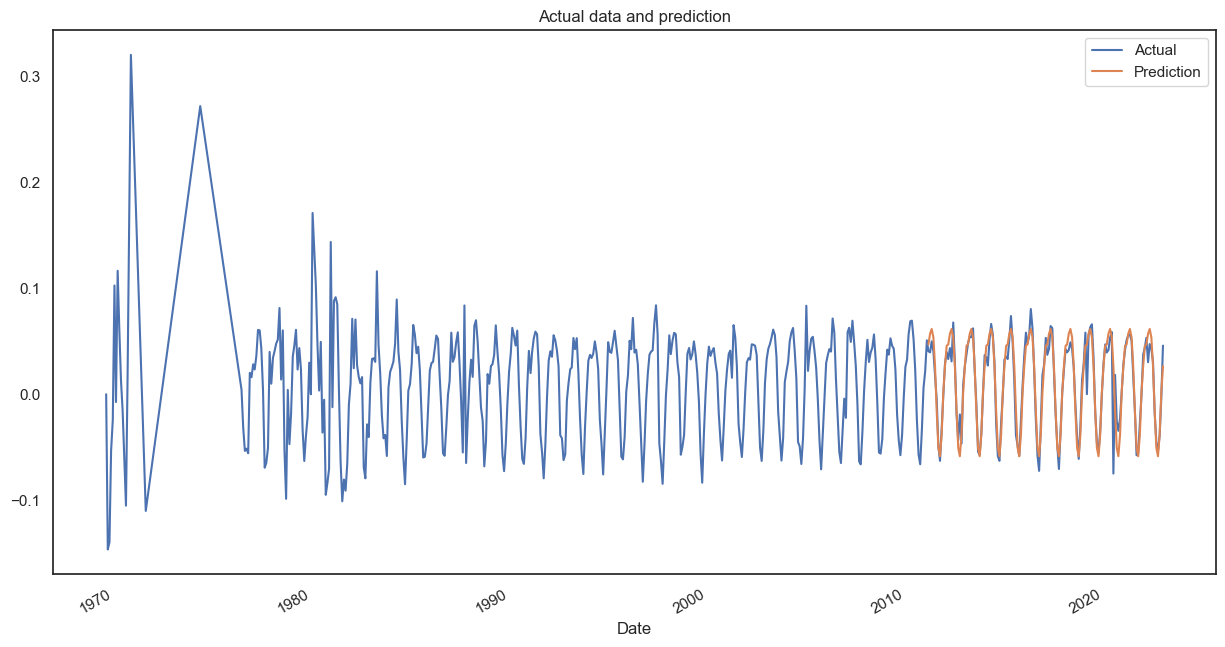

In [42]:
ax = hil_rol['value'].plot(figsize=(15,8))
test['predictions'].plot(ax=ax)
plt.legend(['Actual', 'Prediction'])
ax.set_title('Actual data and prediction')
plt.show();

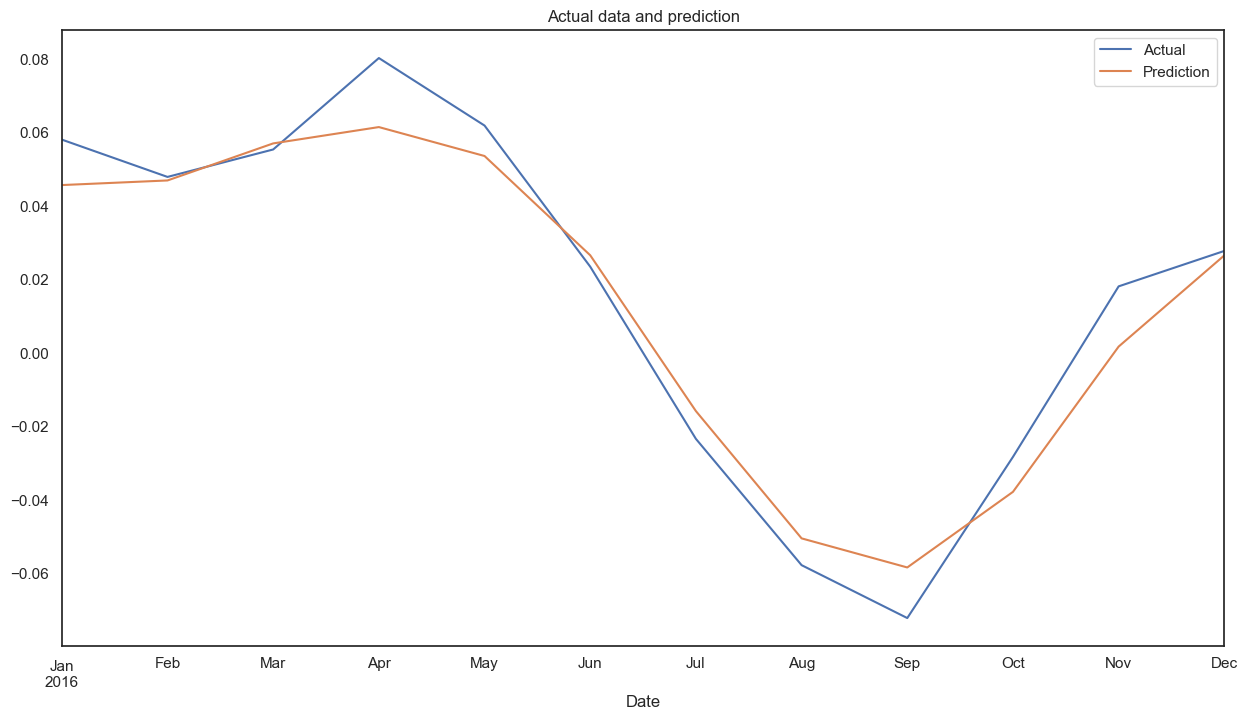

In [43]:
ax = hil_rol.loc[(hil_rol.index > '2016-01-01') & (hil_rol.index < '2017-01-01')]['value'].plot(figsize=(15,8))
test.loc[(test.index > '2016-01-01') & (test.index < '2017-01-01')]['predictions'].plot()
plt.legend(['Actual', 'Prediction'])
ax.set_title('Actual data and prediction')
plt.show();

In [44]:
score = np.sqrt(mean_squared_error(test['value'], test['predictions']))
print(f'RMSE Score of test set: {score:0.2f}')

RMSE Score of test set: 405.40


In [45]:
test['predictions']

Date
2011-02-28    0.046954
2011-03-31    0.057040
2011-04-30    0.061487
2011-05-31    0.053609
2011-06-30    0.026583
                ...   
2022-08-31   -0.050488
2022-09-30   -0.058406
2022-10-31   -0.037822
2022-11-30    0.001726
2022-12-31    0.026550
Name: predictions, Length: 143, dtype: float32